# Dawson Pallotta
# Lab Instructions are in Markdown Cells Throughout the Notebook

Making a professional notebook instructions:
* Add your name after classifying Notebook in the document name
* Update the heading and make new headings to organize the notebook
* Answer the lab questions inside of markdown cells near the relevant code cells
* Add comments to explain what the code in each cell does

Note, this notebook and the last notebook can be turned in as two notebooks, but must be uploaded to Canvas at the same time

In [1]:
#this imports all of the necessary packages for the lab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [2]:
#prints the data from the following csv
data3 = pd.read_csv("C:/Users/student/Downloads/featureSet2weeksDepreST-CAT.csv")
print(data3.shape)
data3.head()

(369, 571)


,id,inTexts0_Absolute energy,inTexts0_Area under the curve,inTexts0_Autocorrelation,inTexts0_Centroid,inTexts0_ECDF Percentile Count_0,inTexts0_ECDF Percentile Count_1,inTexts0_ECDF Percentile_0,inTexts0_ECDF Percentile_1,inTexts0_ECDF_0,...,outCalls0_Wavelet variance_2,outCalls0_Wavelet variance_3,outCalls0_Wavelet variance_4,outCalls0_Wavelet variance_5,outCalls0_Wavelet variance_6,outCalls0_Wavelet variance_7,outCalls0_Wavelet variance_8,outCalls0_Zero crossing rate,phq9,gad7
0,00WRNS3MK,9.0,0.015,9.0,0.000000,2.0,11.0,0.0,0.0,0.071429,...,459.477150,470.749139,418.339485,359.621089,313.628753,279.227008,252.763489,6.0,19,17
1,053F3JF85,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.071429,...,71313.172411,36465.583963,17095.999871,9816.542806,7844.960672,7736.559582,8121.111828,4.0,21,18
2,06YZBXW0E,3502.0,1.885,3502.0,0.052364,2.0,11.0,4.0,19.0,0.071429,...,204709.752186,186733.562302,156745.895593,133391.876158,117398.100146,106005.951572,97271.892871,4.0,4,2
3,0832IIHPX,12330.0,3.380,12330.0,0.057781,2.0,11.0,4.0,35.0,0.071429,...,41170.830053,29359.972379,20128.281500,15130.132857,12683.304503,11425.601575,10674.777554,8.0,7,6
4,0AS1KO35P,860.0,0.845,860.0,0.055721,2.0,11.0,1.0,8.0,0.071429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4,0


In [3]:
d10 = []
g10 = []
for i in range(0, data3.shape[0]):
    if int(data3.phq9[i]) >= 10:
        d10.append(1)
    else:
        d10.append(0)
    if int(data3.gad7[i]) >= 10:
        g10.append(1)
    else:
        g10.append(0)
data3["phq9"] = d10
data3["gad7"] = g10

#### What is the above cell doing? Why would we want to do this?
The above cell is creating two lists called d10 and g10, and then is appending the values that are more than or equal to ten
from the categories of phq9 and gad7 and putting them in the list for d10 and g10

In [4]:
#this prints the feature columns, id columns, target columns, and cnames columns into a table
features = data3[data3.columns[1:-2]]
ids = data3[data3.columns[0:1]]
targets = data3[data3.columns[-2:]]
cnames = features.columns
print(features.shape)
features.head()

(369, 568)


,inTexts0_Absolute energy,inTexts0_Area under the curve,inTexts0_Autocorrelation,inTexts0_Centroid,inTexts0_ECDF Percentile Count_0,inTexts0_ECDF Percentile Count_1,inTexts0_ECDF Percentile_0,inTexts0_ECDF Percentile_1,inTexts0_ECDF_0,inTexts0_ECDF_1,...,outCalls0_Wavelet variance_0,outCalls0_Wavelet variance_1,outCalls0_Wavelet variance_2,outCalls0_Wavelet variance_3,outCalls0_Wavelet variance_4,outCalls0_Wavelet variance_5,outCalls0_Wavelet variance_6,outCalls0_Wavelet variance_7,outCalls0_Wavelet variance_8,outCalls0_Zero crossing rate
0,9.0,0.015,9.0,0.000000,2.0,11.0,0.0,0.0,0.071429,0.142857,...,1044.461838,595.378697,459.477150,470.749139,418.339485,359.621089,313.628753,279.227008,252.763489,6.0
1,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.071429,0.142857,...,107303.053660,87506.881312,71313.172411,36465.583963,17095.999871,9816.542806,7844.960672,7736.559582,8121.111828,4.0
2,3502.0,1.885,3502.0,0.052364,2.0,11.0,4.0,19.0,0.071429,0.142857,...,224107.095817,218449.207781,204709.752186,186733.562302,156745.895593,133391.876158,117398.100146,106005.951572,97271.892871,4.0
3,12330.0,3.380,12330.0,0.057781,2.0,11.0,4.0,35.0,0.071429,0.142857,...,53971.533653,50730.442089,41170.830053,29359.972379,20128.281500,15130.132857,12683.304503,11425.601575,10674.777554,8.0
4,860.0,0.845,860.0,0.055721,2.0,11.0,1.0,8.0,0.071429,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [5]:
#normalize each feature between 0 and 1
#this scales the min max values for the above table
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(features)
sfeatures = pd.DataFrame(np_scaled, columns = cnames)
sfeatures.head()

,inTexts0_Absolute energy,inTexts0_Area under the curve,inTexts0_Autocorrelation,inTexts0_Centroid,inTexts0_ECDF Percentile Count_0,inTexts0_ECDF Percentile Count_1,inTexts0_ECDF Percentile_0,inTexts0_ECDF Percentile_1,inTexts0_ECDF_0,inTexts0_ECDF_1,...,outCalls0_Wavelet variance_0,outCalls0_Wavelet variance_1,outCalls0_Wavelet variance_2,outCalls0_Wavelet variance_3,outCalls0_Wavelet variance_4,outCalls0_Wavelet variance_5,outCalls0_Wavelet variance_6,outCalls0_Wavelet variance_7,outCalls0_Wavelet variance_8,outCalls0_Zero crossing rate
0,0.000045,0.001576,0.000045,0.000000,0.222222,1.0,0.000000,0.000,0.0,0.0,...,0.000029,0.000029,0.000031,0.000024,0.000019,0.000016,0.000014,0.000013,0.000013,0.6
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0,0.0,...,0.002951,0.004306,0.004751,0.001856,0.000771,0.000436,0.000360,0.000374,0.000417,0.4
2,0.017641,0.198108,0.017641,0.434450,0.222222,1.0,0.095238,0.152,0.0,0.0,...,0.006162,0.010749,0.013638,0.009505,0.007069,0.005930,0.005387,0.005122,0.004989,0.4
3,0.062112,0.355229,0.062112,0.479390,0.222222,1.0,0.095238,0.280,0.0,0.0,...,0.001484,0.002496,0.002743,0.001495,0.000908,0.000673,0.000582,0.000552,0.000548,0.8
4,0.004332,0.088807,0.004332,0.462298,0.222222,1.0,0.023810,0.064,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [6]:
#this sets the number of features that are used by the pca  and creates dataframes and inputs them into a new fitted model
numberOfFeatures = 2
pcnames = []
for n in range(0, numberOfFeatures):
    pcnames.append("PC" + str(n))
pca = PCA(n_components=numberOfFeatures)
pca = pca.fit(sfeatures)
X_pca = pca.transform(sfeatures)
pcaDF = pd.DataFrame(X_pca, columns = pcnames)
print(pcaDF.shape)
pcaDF.head()

(369, 2)


,PC0,PC1
0,0.547126,-0.839965
1,0.620034,-1.350896
2,1.016386,-1.132049
3,1.112085,-1.171040
4,-3.474177,0.100178


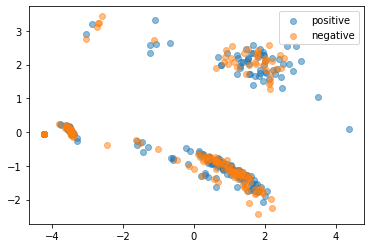

In [7]:
#this kernal shows the different plots of clusters based on what features of the survey are being used
newdf = pcaDF.assign(target = targets["phq9"])
newdf1 = newdf[newdf["target"] >= 1]
newdf2 = newdf[newdf["target"] < 1]

plt.scatter(newdf1['PC0'], newdf1['PC1'], alpha = 0.5, label = "positive")
plt.scatter(newdf2['PC0'], newdf2['PC1'], alpha = 0.5, label = "negative")
plt.legend()
plt.show()
plt.close()

#### Based on your knowledge of how kNN works and the above plot, do you think that kNN will perform well or poorly on this data? Explain your answer.
I belive that it would perform well as the clusters shown are pretty evenly distributed throughout the entire plot

In [33]:
#this trains the pca and only targets the pca for the phq9 values
X_train, X_test, y_train, y_test = train_test_split(pcaDF, targets["phq9"], test_size=0.33, random_state=1)
print(X_train.shape)
X_train.head()

(247, 4)


,PC0,PC1,PC2,PC3
248,1.264294,-1.197909,-0.543740,0.596808
111,1.585362,-1.486508,0.461070,0.749376
51,0.481805,-0.954913,0.254133,-1.584770
92,1.485963,-1.748569,2.030358,1.117134
112,0.657663,-0.863948,-0.620221,-0.929730


#### How many data instances are part of the test set?
247
#### What is the name of the column that comprises the test set? In other words, what are we attempting to classify?
We are attempting to classify the phq9

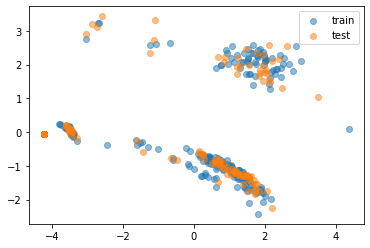

In [34]:
#takes the above PCA data and plots them
plt.scatter(X_train['PC0'], X_train['PC1'], alpha = 0.5, label = "train")
plt.scatter(X_test['PC0'], X_test['PC1'], alpha = 0.5, label = "test")
plt.legend()
plt.show()
plt.close()

#### Based on the scatterplot, how representative are the training points for each cluster?
I would say that they are airly representitive of the clusters
#### Change the random_state multiple times (I reccomend trying from 0 to 10). What changes? 
The changes that I see is that a lot of the test values in the pca changes 
#### What random_state do you think is the most representative? What random_state do you think is the least representative?
I think the most representitive random_state is a random_state of 7 and the least representative is 3

# Set Random State in Below Cell to Most Visually Representative

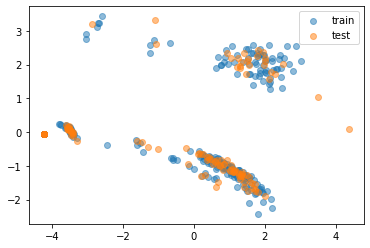

In [42]:
#this provides the PCA for the most visually representitive of the data for phq9 by setting the random state to 7
X_train, X_test, y_train, y_test = train_test_split(pcaDF, targets["phq9"], test_size=0.33, random_state=7)
plt.scatter(X_train['PC0'], X_train['PC1'], alpha = 0.5, label = "train")
plt.scatter(X_test['PC0'], X_test['PC1'], alpha = 0.5, label = "test")
plt.legend()
plt.show()
plt.close()

In [43]:
#this calculates the values for true negative, true positive, false positive, and false negative for the neighbor 
# classification above 
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
TN = conf_mat[0][0]
TP = conf_mat[1][1]
FP = conf_mat[0][1]
FN = conf_mat[1][0]

conf_mat

array([[10, 42],
       [21, 49]], dtype=int64)

#### Using the TN, TP, FP, FN values, calculate and report on the accuracy of the model.
The accuracy of the model doesn't appear to be accurate ase the accuracy is 43%
#### From the TN, TP, FP, FN values, which is most numerous? Least numerous?
False negative is the most numerouse with a value of 49, and TN being the least with 10

# Set Random State in the Below Cell to the Least Visually Representative 

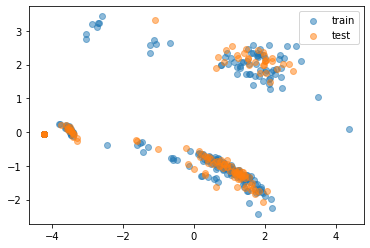

In [48]:
#this provides the PCA for the least visually representitive of the data for phq9 by setting the random state to 3
X_train, X_test, y_train, y_test = train_test_split(pcaDF, targets["phq9"], test_size=0.33, random_state=3)
plt.scatter(X_train['PC0'], X_train['PC1'], alpha = 0.5, label = "train")
plt.scatter(X_test['PC0'], X_test['PC1'], alpha = 0.5, label = "test")
plt.legend()
plt.show()
plt.close()

In [47]:
#this calculates the values for true negative, true positive, false positive, and false negative for the neighbor 
# classification above 
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
TN = conf_mat[0][0]
TP = conf_mat[1][1]
FP = conf_mat[0][1]
FN = conf_mat[1][0]

conf_mat

array([[12, 39],
       [31, 40]], dtype=int64)

#### Using the TN, TP, FP, FN values, calculate and report on the accuracy of the model.
This model is not very accurate as it has arround the same accuracy as the above confusion matrix with a accuracy rate of 41
#### From the TN, TP, FP, FN values, which is most numerous? Least numerous?
The most numerous is the FN with  40 and TN with 12

#### Was the accuracy higher with the data split from the most representative or least representative random_state?
They were both relatively the same as each other

In [49]:
#this sets the number of features to 2 for the pca analysis, and then creates a classifier analysis and uses a confusion
#matrix in order to print the value of the average accuracy of the classifier and the standard deviations
numberOfFeatures = 2
pcnames = []
for n in range(0, numberOfFeatures):
    pcnames.append("PC" + str(n))
pca = PCA(n_components=numberOfFeatures)
pca = pca.fit(sfeatures)
X_pca = pca.transform(sfeatures)
pcaDF = pd.DataFrame(X_pca, columns = pcnames)
pcaDF.head()

alist = []
for r in range(0, 10):
    X_train, X_test, y_train, y_test = train_test_split(pcaDF, targets["phq9"], test_size=0.33, random_state=r)
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    TN = conf_mat[0][0]
    TP = conf_mat[1][1]
    FP = conf_mat[0][1]
    FN = conf_mat[1][0]
    accuracy = (TP+TN)/(TN+TP+FP+FN)
    alist.append(accuracy)

print(sum(alist)/len(alist))
print(np.std(alist))

0.5081967213114754
0.02318382889136222


#### How many principal components does the above block of code use? What is the average accuracy? What is the standard deviation?
The number of prinicpal components that is used above is 2, the average accuracy is 50%, and teh standard deviation is .02

In [50]:
#this sets the number of features to 4 for the pca analysis, and then creates a classifier analysis and uses a confusion
#matrix in order to print the value of the average accuracy of the classifier and the standard deviations
numberOfFeatures = 4
pcnames = []
for n in range(0, numberOfFeatures):
    pcnames.append("PC" + str(n))
pca = PCA(n_components=numberOfFeatures)
pca = pca.fit(sfeatures)
X_pca = pca.transform(sfeatures)
pcaDF = pd.DataFrame(X_pca, columns = pcnames)
pcaDF.head()

alist = []
for r in range(0, 10):
    X_train, X_test, y_train, y_test = train_test_split(pcaDF, targets["phq9"], test_size=0.33, random_state=r)
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    TN = conf_mat[0][0]
    TP = conf_mat[1][1]
    FP = conf_mat[0][1]
    FN = conf_mat[1][0]
    accuracy = (TP+TN)/(TN+TP+FP+FN)
    alist.append(accuracy)

print(sum(alist)/len(alist))
print(np.std(alist))

0.4754098360655738
0.03278688524590165


#### How many principal components does the above block of code use? What is the average accuracy? What is the standard deviation?
The number of principal componnets above is 4, the average accuracy is 47%, and the standard deviation is .03

#### Based on the above results, does increasing the number of principal components improve the classification ability?
No, as seen in the average accuracy, it actually drops and has a higher standard deviation wel the principal components increases

#### Did the kNN classifiers perform well or poorly? Explain your answer. 
The kNN classifiers didn;t perform very well as the accuracy of the pca for the kNN didn't hold very high value with the average 
accuracy being 48%